In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spicy
import scipy.stats as st
import calendar
from statsmodels.tsa.seasonal import seasonal_decompose as sm
import statsmodels as sm
import statsmodels.api as sm

In [2]:
data = pd.read_excel("price forecasting .xlsx")

In [3]:
data.head()

Date  Dry Chillies
0 2006-07-26        5000.0
1 2006-07-28        4500.0
2 2006-07-29           NaN
3 2006-07-31        4400.0
4 2006-08-02        4700.0

In [4]:
data.tail()

Date  Dry Chillies
3763 2023-04-29       21000.0
3764 2023-04-30       21000.0
3765 2023-05-01       21000.0
3766 2023-05-02       21000.0
3767 2023-05-03       22000.0

In [5]:
data.shape

(3768, 2)

In [6]:
data.describe()

Dry Chillies
count   2383.000000
mean   11177.045741
std     4763.482981
min     2700.000000
25%     7200.000000
50%    10000.000000
75%    13800.000000
max    23800.000000

## Checking null values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3768 non-null   datetime64[ns]
 1   Dry Chillies  2383 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [8]:
data.isnull().sum()

Date               0
Dry Chillies    1385
dtype: int64

In [9]:
data.isna().mean().round(4) * 100

Date             0.00
Dry Chillies    36.76
dtype: float64

In [10]:
row_nan = data[data.isnull().any(axis=1)]

In [11]:
row_nan

Date  Dry Chillies
2    2006-07-29           NaN
12   2006-08-16           NaN
20   2006-08-31           NaN
23   2006-09-07           NaN
25   2006-09-11           NaN
...         ...           ...
3476 2022-07-10           NaN
3482 2022-07-16           NaN
3483 2022-07-17           NaN
3489 2022-07-23           NaN
3490 2022-07-24           NaN

[1385 rows x 2 columns]

### Performaing eda to implement null values

In [12]:
data.skew()

C:\Users\HP\AppData\Local\Temp\ipykernel_22200\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Dry Chillies    0.788451
dtype: float64

<AxesSubplot:>

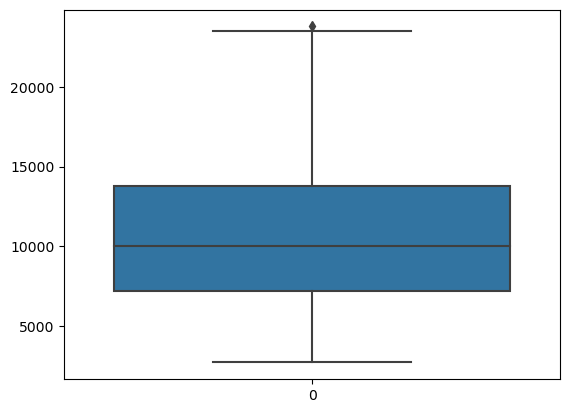

In [13]:
sns.boxplot(data=[data['Dry Chillies']])

In [14]:
data[data['Dry Chillies'] ==23800.000000 ]

Date  Dry Chillies
3493 2022-07-27       23800.0

 ## Applying missing  values imputation methods of time series

## Applying forwards linear interploation for missing values

In [15]:
data_ffilled  = data['Dry Chillies'].ffill()

In [16]:
data['Dry_Chillies_clean'] = data_ffilled.interpolate(method='linear')


In [17]:
data.isnull().sum()

Date                     0
Dry Chillies          1385
Dry_Chillies_clean       0
dtype: int64

## filled missing values forword fill  linear interpoluation

## Eda on data

In [18]:
data['year'] = data['Date'].dt.year

In [19]:
data['month'] = data['Date'].dt.month

In [20]:
data['day'] = data['Date'].dt.day

In [21]:
data

Date  Dry Chillies  Dry_Chillies_clean  year  month  day
0    2006-07-26        5000.0              5000.0  2006      7   26
1    2006-07-28        4500.0              4500.0  2006      7   28
2    2006-07-29           NaN              4500.0  2006      7   29
3    2006-07-31        4400.0              4400.0  2006      7   31
4    2006-08-02        4700.0              4700.0  2006      8    2
...         ...           ...                 ...   ...    ...  ...
3763 2023-04-29       21000.0             21000.0  2023      4   29
3764 2023-04-30       21000.0             21000.0  2023      4   30
3765 2023-05-01       21000.0             21000.0  2023      5    1
3766 2023-05-02       21000.0             21000.0  2023      5    2
3767 2023-05-03       22000.0             22000.0  2023      5    3

[3768 rows x 6 columns]

In [22]:
calendar.month_abbr[1]


'Jan'

In [23]:
data['Month'] = data['month'].apply(lambda x:calendar.month_abbr[x])

In [24]:
data

Date  Dry Chillies  Dry_Chillies_clean  year  month  day Month
0    2006-07-26        5000.0              5000.0  2006      7   26   Jul
1    2006-07-28        4500.0              4500.0  2006      7   28   Jul
2    2006-07-29           NaN              4500.0  2006      7   29   Jul
3    2006-07-31        4400.0              4400.0  2006      7   31   Jul
4    2006-08-02        4700.0              4700.0  2006      8    2   Aug
...         ...           ...                 ...   ...    ...  ...   ...
3763 2023-04-29       21000.0             21000.0  2023      4   29   Apr
3764 2023-04-30       21000.0             21000.0  2023      4   30   Apr
3765 2023-05-01       21000.0             21000.0  2023      5    1   May
3766 2023-05-02       21000.0             21000.0  2023      5    2   May
3767 2023-05-03       22000.0             22000.0  2023      5    3   May

[3768 rows x 7 columns]

### Eda

In [25]:
data.columns

Index(['Date', 'Dry Chillies', 'Dry_Chillies_clean', 'year', 'month', 'day',
       'Month'],
      dtype='object')

In [26]:
data2 = pd.read_excel('price forecasting .xlsx')

In [27]:
data2

Date  Dry Chillies
0    2006-07-26        5000.0
1    2006-07-28        4500.0
2    2006-07-29           NaN
3    2006-07-31        4400.0
4    2006-08-02        4700.0
...         ...           ...
3763 2023-04-29       21000.0
3764 2023-04-30       21000.0
3765 2023-05-01       21000.0
3766 2023-05-02       21000.0
3767 2023-05-03       22000.0

[3768 rows x 2 columns]

In [28]:
data_ffilled  = data2['Dry Chillies'].ffill()

In [29]:
data2['Dry_Chillies_clean'] = data_ffilled.interpolate(method='linear')

In [30]:
data2

Date  Dry Chillies  Dry_Chillies_clean
0    2006-07-26        5000.0              5000.0
1    2006-07-28        4500.0              4500.0
2    2006-07-29           NaN              4500.0
3    2006-07-31        4400.0              4400.0
4    2006-08-02        4700.0              4700.0
...         ...           ...                 ...
3763 2023-04-29       21000.0             21000.0
3764 2023-04-30       21000.0             21000.0
3765 2023-05-01       21000.0             21000.0
3766 2023-05-02       21000.0             21000.0
3767 2023-05-03       22000.0             22000.0

[3768 rows x 3 columns]

In [31]:
data_3 = data2.drop('Dry Chillies',axis=1)

In [32]:
data_3

Date  Dry_Chillies_clean
0    2006-07-26              5000.0
1    2006-07-28              4500.0
2    2006-07-29              4500.0
3    2006-07-31              4400.0
4    2006-08-02              4700.0
...         ...                 ...
3763 2023-04-29             21000.0
3764 2023-04-30             21000.0
3765 2023-05-01             21000.0
3766 2023-05-02             21000.0
3767 2023-05-03             22000.0

[3768 rows x 2 columns]

In [33]:
data_3['year'] = data_3['Date'].dt.year

In [34]:
data_3['month'] = data_3['Date'].dt.month

In [35]:
data_3['day'] = data_3['Date'].dt.day

In [36]:
data_3

Date  Dry_Chillies_clean  year  month  day
0    2006-07-26              5000.0  2006      7   26
1    2006-07-28              4500.0  2006      7   28
2    2006-07-29              4500.0  2006      7   29
3    2006-07-31              4400.0  2006      7   31
4    2006-08-02              4700.0  2006      8    2
...         ...                 ...   ...    ...  ...
3763 2023-04-29             21000.0  2023      4   29
3764 2023-04-30             21000.0  2023      4   30
3765 2023-05-01             21000.0  2023      5    1
3766 2023-05-02             21000.0  2023      5    2
3767 2023-05-03             22000.0  2023      5    3

[3768 rows x 5 columns]

In [37]:
 data_3.set_index('Date',inplace=True)

In [38]:
data_3

Dry_Chillies_clean  year  month  day
Date                                            
2006-07-26              5000.0  2006      7   26
2006-07-28              4500.0  2006      7   28
2006-07-29              4500.0  2006      7   29
2006-07-31              4400.0  2006      7   31
2006-08-02              4700.0  2006      8    2
...                        ...   ...    ...  ...
2023-04-29             21000.0  2023      4   29
2023-04-30             21000.0  2023      4   30
2023-05-01             21000.0  2023      5    1
2023-05-02             21000.0  2023      5    2
2023-05-03             22000.0  2023      5    3

[3768 rows x 4 columns]

In [39]:
data_3.index.name = None

In [44]:
data_3

Dry_Chillies_clean  year  month  day
2006-07-26              5000.0  2006      7   26
2006-07-28              4500.0  2006      7   28
2006-07-29              4500.0  2006      7   29
2006-07-31              4400.0  2006      7   31
2006-08-02              4700.0  2006      8    2
...                        ...   ...    ...  ...
2023-04-29             21000.0  2023      4   29
2023-04-30             21000.0  2023      4   30
2023-05-01             21000.0  2023      5    1
2023-05-02             21000.0  2023      5    2
2023-05-03             22000.0  2023      5    3

[3768 rows x 4 columns]

In [40]:
data_line = data_3['Dry_Chillies_clean']

In [41]:
data_line

2006-07-26     5000.0
2006-07-28     4500.0
2006-07-29     4500.0
2006-07-31     4400.0
2006-08-02     4700.0
               ...   
2023-04-29    21000.0
2023-04-30    21000.0
2023-05-01    21000.0
2023-05-02    21000.0
2023-05-03    22000.0
Name: Dry_Chillies_clean, Length: 3768, dtype: float64

<AxesSubplot:>

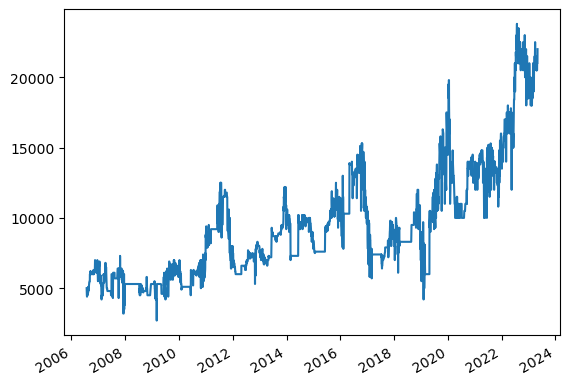

In [42]:
data_line.plot()

## Decompasing

In [54]:
decomposition = sm.tsa.seasonal_decompose(x = data_3
                                          , model = 'additive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [9.0,5.0]

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [53]:
type(data_3)

pandas.core.frame.DataFrame